# California Housing Data Analysis
This notebook explores the California Housing dataset from sklearn, covering data extraction, cleaning, transformation, and visualization.

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

# Load the dataset
california = fetch_california_housing()

# Create a DataFrame
df = pd.DataFrame(california.data, columns=california.feature_names)
df['Target'] = california.target  # Add target variable (Median house value)

# Show the first few rows
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Data Exploration: Overview of the Dataset
We will explore the structure of the dataset and check for missing values.

In [2]:
# Basic info about the dataset
print("Shape of the dataset:", df.shape)
df.info()

# Summary statistics
df.describe()

# Check for missing values
df.isnull().sum()

Shape of the dataset: (20640, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

## Data Cleaning: Handling Outliers
We will check for outliers using boxplots and remove or cap them as needed.

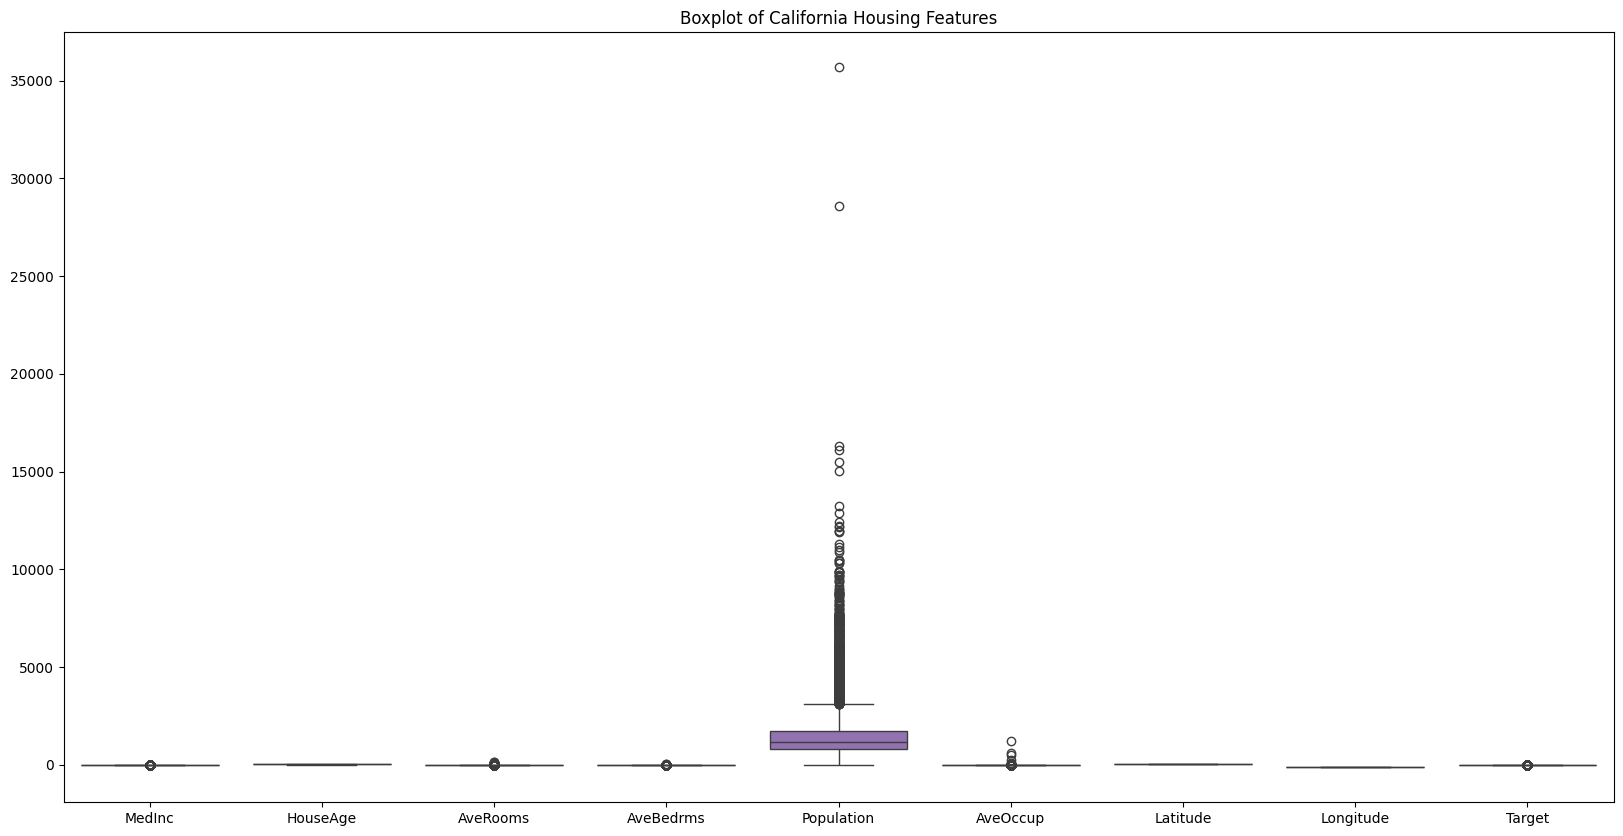

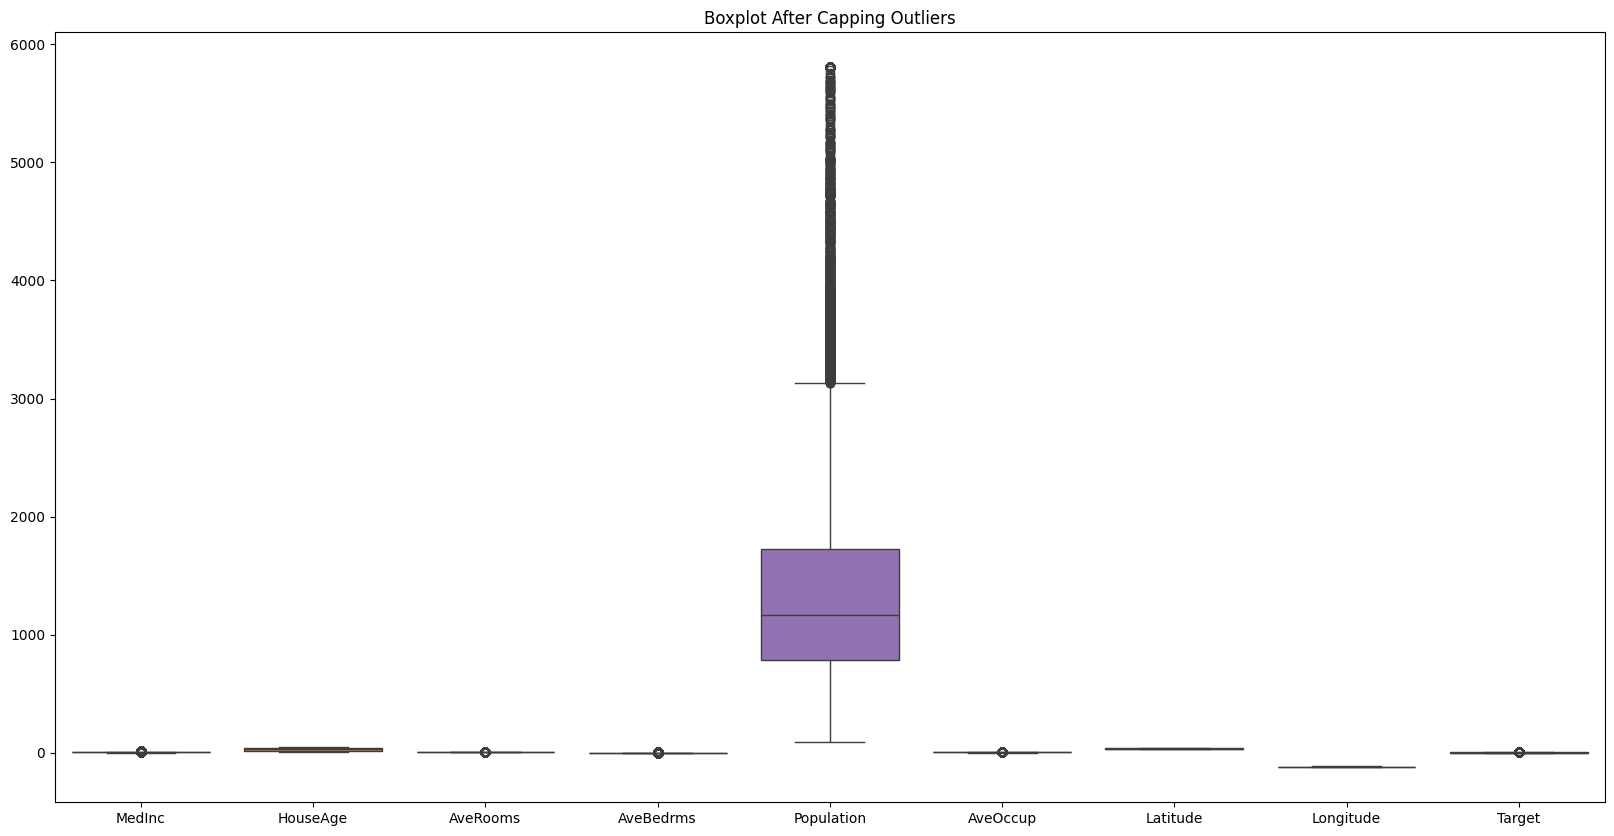

In [3]:
# Boxplot of all features to check for outliers
plt.figure(figsize=(20, 10))
sns.boxplot(data=df)
plt.title("Boxplot of California Housing Features")
plt.show()

# Handling outliers: We'll cap values beyond the 99th percentile
for col in df.columns:
    df[col] = df[col].clip(lower=df[col].quantile(0.01), upper=df[col].quantile(0.99))

# Verify if outliers were capped
plt.figure(figsize=(20, 10))
sns.boxplot(data=df)
plt.title("Boxplot After Capping Outliers")
plt.show()

## Data Transformation: Standardization
We'll standardize the features to have a mean of 0 and a standard deviation of 1.

In [4]:
# Standardizing the features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop('Target', axis=1)), columns=df.columns[:-1])
df_scaled['Target'] = df['Target']

# Show the scaled features
df_scaled.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,2.479625,0.982870,1.248432,-0.336012,-1.112147,-0.492722,1.060350,-1.346081,4.526
1,2.466431,-0.608654,0.683977,-0.663557,1.024755,-1.101386,1.050933,-1.341022,3.585
2,1.887680,1.858207,2.235113,-0.022925,-0.933301,-0.155824,1.046224,-1.351141,3.521
3,0.992779,1.858207,0.365588,-0.025366,-0.869574,-0.503114,1.046224,-1.356201,3.413
4,-0.003348,1.858207,0.717055,0.025232,-0.862379,-1.003575,1.046224,-1.356201,3.422


## Data Visualization: Correlation Heatmap and Distributions
We will create visualizations to explore relationships in the data.

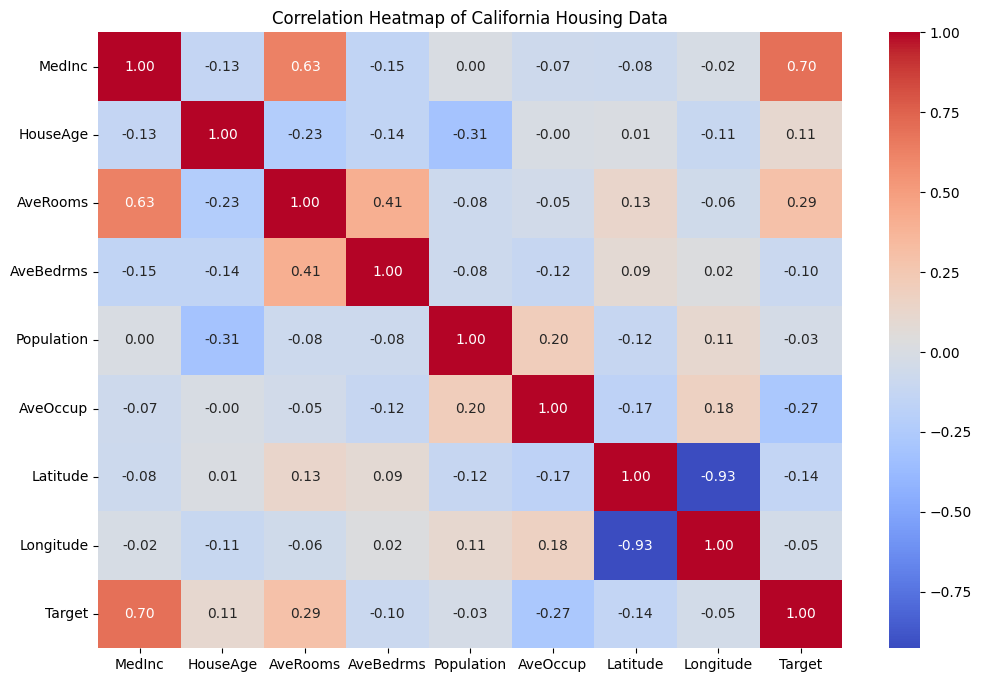

In [5]:
# Correlation heatmap of the features
plt.figure(figsize=(12, 8))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of California Housing Data")
plt.show()

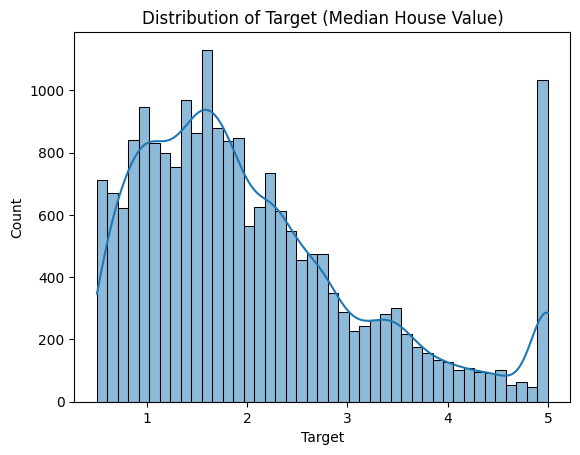

In [6]:
# Distribution of the target variable
sns.histplot(df_scaled['Target'], kde=True)
plt.title("Distribution of Target (Median House Value)")
plt.show()

## Conclusion
- The dataset was cleaned, outliers were capped, and the features were standardized.
- We visualized the relationships between features and checked the distribution of the target variable.
- Further analysis could include modeling the data for prediction or regression tasks.